In [1]:
import cv2
import matplotlib.pyplot as plt

Original image shape: (720, 1280, 3)


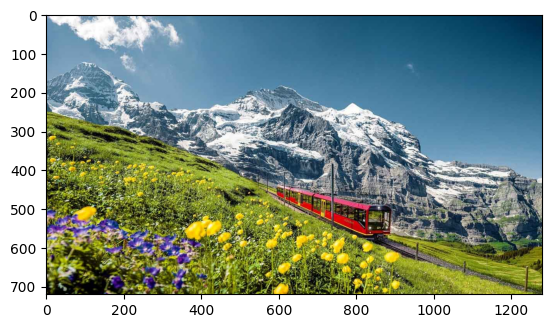

In [2]:
# Load the image using OpenCV (which loads images in BGR format)
bgr_image = cv2.imread("original_image.png")

# Convert BGR to RGB for correct color representation in Matplotlib
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image) # Display the image

# shape is in the format (height, width, channels)
print("Original image shape:", rgb_image.shape)

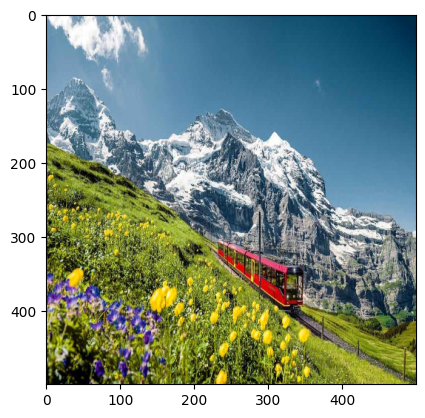

In [3]:
# Image resizing
new_width, new_height = 500, 500
resized_image = cv2.resize(rgb_image, (new_width, new_height))
plt.imshow(resized_image)

Original image shape: (720, 1280, 3)
Scaled image shape: (360, 640, 3)


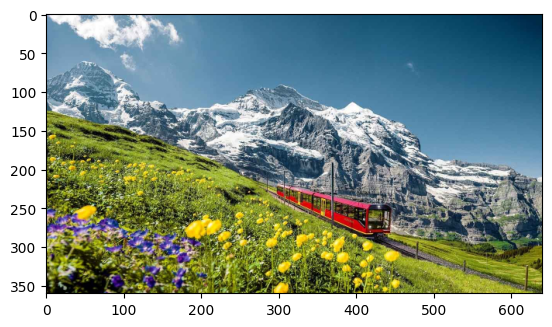

In [4]:
# Image scaling
scale_percent = 50
scale_width = int(rgb_image.shape[1] * scale_percent / 100)
scale_height = int(rgb_image.shape[0] * scale_percent / 100)
scaled_image = cv2.resize(rgb_image, (scale_width, scale_height), interpolation=cv2.INTER_AREA)

plt.imshow(scaled_image)
print("Original image shape:", rgb_image.shape)
print("Scaled image shape:", scaled_image.shape)

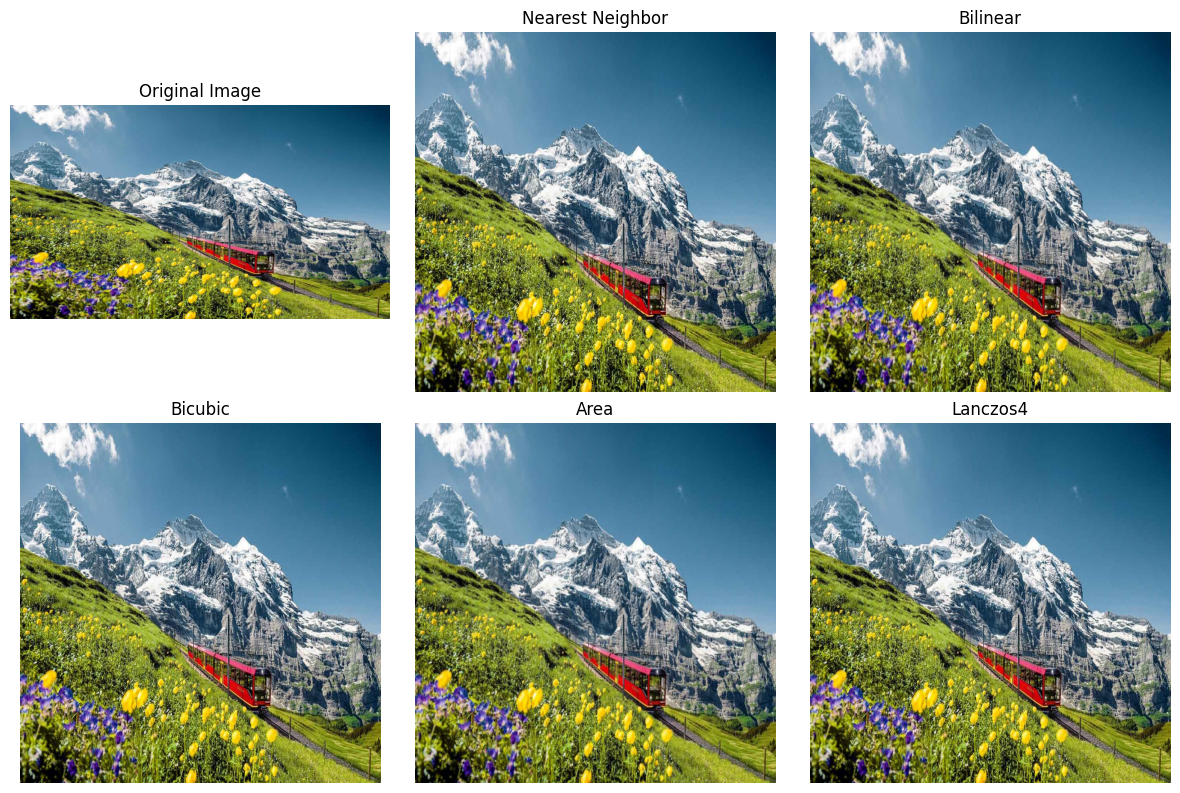

In [5]:
# Interpolation methods
resize_width, resize_height = 600, 600

interpolations = {
    "Nearest Neighbor": cv2.INTER_NEAREST,
    "Bilinear": cv2.INTER_LINEAR,
    "Bicubic": cv2.INTER_CUBIC,
    "Area": cv2.INTER_AREA,
    "Lanczos4": cv2.INTER_LANCZOS4
}

resized_images = {}
for name, method in interpolations.items():
    resized_images[name] = cv2.resize(rgb_image, (resize_width, resize_height), interpolation=method)

plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(rgb_image)
plt.title("Original Image")
plt.axis('off')

# Resized images with different interpolation methods
for i, (name, resized_image) in enumerate(resized_images.items(), start=2):
    plt.subplot(2, 3, i)
    plt.imshow(resized_image)
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Best practices

# --- TRƯỜNG HỢP 1: THU NHỎ ẢNH (DOWNSCALING) ---
# Dùng INTER_AREA để tránh bị nhiễu hạt
downscaled = cv2.resize(bgr_image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# --- TRƯỜNG HỢP 2: PHÓNG TO THỜI GIAN THỰC (REAL-TIME UPSCALING) ---
# Dùng INTER_LINEAR để đảm bảo tốc độ FPS cao
realtime_upscale = cv2.resize(bgr_image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_LINEAR)

# --- TRƯỜNG HỢP 3: PHÓNG TO CHẤT LƯỢNG CAO (HIGH QUALITY UPSCALING) ---
# Dùng INTER_LANCZOS4 để ảnh sắc nét nhất (chấp nhận chậm)
# Thích hợp cho xử lý ảnh y tế, in ấn, hoặc chuẩn bị dữ liệu train AI
high_quality_upscale = cv2.resize(bgr_image, None, fx=4.0, fy=4.0, interpolation=cv2.INTER_LANCZOS4)

# Giải thích các tham số chính của hàm cv2.resize():
# + None (dsize - Destination Size): Kích thước chính xác của ảnh đầu ra (width, height). Có thể chỉ định rõ hoặc để None.
# + fx, fy: Hệ số tỉ lệ theo chiều ngang (width) và chiều dọc (height). Sử dụng khi dsize là None.